<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/Informe_OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descripción del problema(optimización)**

Los problemas de optimización,

Se usan cuando los subproblemas se repiten, para este caso cuando los subproblemas se repiten es necesario guardar cada subproblema para resolverlo una vez para evitar realizar el mismo trabajo más de una vez.


*   los problemas que requieren maximizar o minimizar ciertas cantidades o problemas de conteo.
*   Todos los problemas de programación dinámica satisfacen la propiedad de subproblemas superpuestos 

En este informe resolveremos el problema de Árboles binarios de búsqueda óptimos.

La idea de construir este árbol es minimizar el costo de búsqueda:


**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$


**Salida**: Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado).







foto

# **2.Decripción del algoritmo**

Existen varias formas de implementarn el algoritmo BST en esta ocacion veremos 2, algoritmo recursivo y bottom-up (programación dinámica).

algoritmo recursivo para resolver el problema del árbol binario de búsqueda óptimo:





***Acercamiento*** bottom-up (programación dinámica) para resolver el problema:

Este algoritmo recibe 3 parámetros principales *p*, *q* y *n*

p , q son probabilidades y n es el tama;o de la matriz.

fases:



1.   inicializamos e[i; i - 1] y w[i; i - 1]. 
2.   en la primera iteración, cuando l es == 1, e[i; i] y w[i; i] for i = 1, 2..... n
3.   en la segunda iteración, cuando l es == 1, e[i; i] y w[i; i] for i = 1, 2..... n - 1
4. se guardan los valores actuales de r en
root[i; j] 



## **Ejemplo paso a paso**

obtendremos los siguinetes datos



```
 i	  0	  1	  2	   3
pi	        0.5    0.1	 0.05
qi	0.15	0.1	0.05	0.05
```

Creamos las matrices **e** , **w** y **root**

Ahora inicializamos las matrices de esta manera


primero **w** y **e**:

Se debe cumplir que j = i - 1

$$w[1,0] = \sum_{m=1}^{0}p_m + \sum_{m=0}^{0}q_m = q_0= 0.15$$
$$w[2,1] = \sum_{m=2}^{1}p_m + \sum_{m=1}^{1}q_m = q_1= 0.1$$
$$w[3,2] = \sum_{m=3}^{2}p_m + \sum_{m=2}^{2}q_m = q_2= 0.05$$
$$w[4,3] = \sum_{m=4}^{3}p_m + \sum_{m=3}^{3}q_m = q_3= 0.05$$

```
[w]             i
     1      2      3      4
  3 [0]    [0]    [0]   [0.05]

  2 [0]    [0]    [0.05]
j
  1 [0]   [0.1]

  0 [0.15]
```

Ahora vemos como queda la matiz **e**

```


e[1,  0] = q0 = 0.15  se debe cumplir ( j = i – 1)

e[2,  1] = q1 = 0.1   se debe cumplir ( j = i – 1)

e[3,  2] = q2 = 0.05  se debe cumplir ( j = i – 1)

e[4,  3] = q3 = 0.05  se debe cumplir ( j = i – 1)


```

Quedaria asi:


```
[e]            i
     1      2      3      4
  3 [0]    [0]    [0]   [0.05]

  2 [0]    [0]    [0.05]
j
  1 [0]   [0.1]

  0 [0.15]
```

el segundo paso seria:
$$w[1,1] = p_1 + q_0 + q_1 = 0.75$$
$$w[2,2] = p_2 + q_1 + q_2 = 0.25$$
$$w[3,3] = p_3 + q_2 + q_3 = 0.15$$

```
[w]             i
     1      2      3      4
  3 [0]    [0]   [0.15] [0.05]

  2 [0]   [0.25]  [0.05]
j
  1 [0.75] [0.1]

  0 [0.15]
```
```

e[1,  1] = min { e[1,  0] + e[2,  1] + w(1, 1) }

        =   min { 0.15 + 0.1 + 0.75 } = 1.0

e[2,  2] =   min { e[2,  1] + e[3,  2] + w(2, 2) }

        =   min { 0.1 + 0.05 + 0.25 } = 0.4

 e[3,  3] =   min { e[3,  2] + e[4,  3] + w(3, 3) }

         = min { 0.05 + 0.05 + 0.15 } = 0.25


```
```
[e]            i
     1       2       3       4
  3 [0]    [0]     [0.25]   [0.05]

  2 [0]    [0.4]   [0.05]
j
  1 [1.0]  [0.1]

  0 [0.15]

```
si repetimos estos pasos correctamente hasta completar la matriz nos quedaria algoa asi:


```
[w]             i
     1         2         3        4
  3 [1.0]    [0.35]    [0.15]   [0.05]

  2 [0.90]   [0.25]    [0.05]
j
  1 [0.75]   [0.1]

  0 [0.15]
```
```
[e]            i
     1         2       3       4
  3 [1.95]   [0.8]   [0.25]   [0.05]

  2 [1.45]   [0.4]   [0.05]
j
  1 [1.0]    [0.1]

  0 [0.15]

```
Ahora debemos construir el arbol para eso se deben cumplir ciertas condiciones


e[1, 3] es minimo de r = 1, so r[1, 3] = 1

e[2, 3] es minimo de r = 2, so r[2, 3] = 2

e[1, 2] es minimo de r = 1, so r[1, 2] = 1

e[3, 3] es minimo de r = 3, so r[3, 3] = 3

e[2, 2] es minimo de r = 2, so r[2, 2] = 2

e[1, 1] es minimo de r = 1, so r[1, 1] = 1


nos quedaria la matriz del arbol de esta manera:


```
[root]  
           i
     1     2     3       
  3 [1]   [2]   [3]   

  2 [1]   [2]   
j
  1 [1]    

```



## **2.1.Codigo**

### **bottom-up**

In [2]:
import numpy as np
from math import inf

def optimalBST(p, q, n):

#se crean las matrices
  e = np.zeros(shape=(n+2,n+1))

  w = np.zeros(shape=(n+2,n+1))

  root = np.zeros((n+1, n+1), dtype = int)
#se inicializan las matrices   
  for i  in range(1,n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]

  for l  in range(1,n + 1):
    for i in range(1, n - l + 2):
      j = i + l - 1
      
      e[i][j] = inf

      w[i][j] = w[i][j-1] + p[j - 1] + q[j]
      for  r  in range(i,j + 1):
          t  = e[i][r - 1] + e[r + 1][j] + w[i][j]
          if t  < e[i][j] :
            e[i][j] = t
            root[i][j] = r

#print(e,root)
  return (e, root)


p = [0.5  ,  0.1   ,  0.05]
q = [0.15  ,  0.1 ,   0.05 ,   0.05]
k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
(e, root) = optimalBST(p, q, len(p))
print(e)
print( )
print(root)

[[0.   0.   0.   0.   0.   0.  ]
 [0.05 0.45 0.9  1.25 1.75 2.75]
 [0.   0.1  0.4  0.7  1.2  2.  ]
 [0.   0.   0.05 0.25 0.6  1.3 ]
 [0.   0.   0.   0.05 0.3  0.9 ]
 [0.   0.   0.   0.   0.05 0.5 ]
 [0.   0.   0.   0.   0.   0.1 ]]

[[0 0 0 0 0 0]
 [0 1 1 2 2 2]
 [0 0 2 2 2 4]
 [0 0 0 3 4 5]
 [0 0 0 0 4 5]
 [0 0 0 0 0 5]]


# **3.Correctitud**

Demuestre por qué el algoritmo bottom-up es correcto (es decir, calcula el árbol con mínimo costo). Para demostrar que el algoritmo es correcto debe:

(listo)a. Demostrar/explicar que resolver el problema original es equivalente a resolver una serie de subproblemas de menor tamaño y combinar sus resultados (subestructura óptima)

(listo)b. Definir una función recurrente para el valor óptimo del problema en base a lo mostrado en el punto a.

c. Demostrar (por inducción o propiedad de bucle invariante) que el algoritmo bottom-up resuelve cada subproblema en base a la función recurrente y a los valores óptimos de los subproblemas más pequeños (que ya fueron resueltos antes).

d. Mostrar que el último problema que resuelve el algoritmo bottom-up es, en efecto, el problema original.


Para demostrar el que el algoritmo bottom-up es correcto, debemos calcular el costo mínimo lo que nos llevara una búsqueda bastante exhaustiva de todas las posibilidades, para eso etiquetamos los nodos de ***k_1,k_2...k_n *** para crear el árbol binario y agregarle las claves ficticias, esta búsqueda de árbol binario con n nodos tendíamos que examinar un número exponencial de árboles, por lo que es normal que debamos resolver este problema con programación dinámica.

**Subestructura óptima**

Para la subestructura optima debemos considerar que cualquier sub arbol **$k_i...k_j $** debemos saber que se debe cumplir que **$1 <= i <= j <= n$**, donde los sub arboles deben contener claves ficticias **$di-1,....dj$**

Ahora sabemos que el árbol binario de búsqueda óptimo **T** tiene sub arboles que contienen las claves **$k_i...k_j $** con sus respectivas claves ficticias **$d_i-1,....d_j$** pdemos decir que $k_r (i <=  r <= j)$ es sub raiz de una sub arbol optimo que contiene todas las claves 

El subaarbol izquierdo contendria todas la claves k_r  **$k_i...k_r-1 $** y **$di-1,....dr-1$** y el sub arbol derecho contiene **$k_r+1...k_j $**.

al examinar todos los candidatos $k_r$ y aseguraramos que encontramos árbol binario de búsqueda óptimo mientras $i<= r <= j$


**Definir una función recurrente**

para definir nuestra funncion rurrente debemos saber nuestro dominio de subproblema que contenga las claves **$k_i...k_j $** cuando **$1 <= i <= j <= n$**.Ahora podemos definir e[i,j] que es el costo esperado 






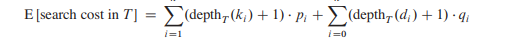

La manera de calcular la suma de las probabilidades para cada sub arbol seria:

$w[i,j] = \sum_{l=i}^{j}p_l + \sum_{l=i-1}^{j}q_l$

De esta manera tenemos que en el caso de que $K_r$ es una raiz de un árbol binario de búsqueda óptimo **$k_i...k_j $** tenemo que:

$e[i,j] = p_r + (e[i,r-1]+w(i,r-1))+(e[r+1,j]+w(r+1,j))$

ahora podemos notar que:

$w(i,j)=w(i,r-1) + p_r + w(r+1,j)$

ahora que notamos como queda $w(i,j)$ podemos reescribir $e[i,j]$

$e[i,j] = e[i,r-1] + e[r+1,j]+ w(i,j)$

La formula recursiva nos quedaria asi:



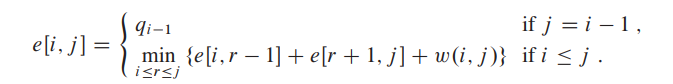

**Desmostrando la correctitud por induccion**

Caso base


Mantencion 


Finalizacion